### THE SPARKS FOUNDATION - TASKS

#### PREDICITION USING DECISION TREE CLASSIFIER ( LEVEL INTERMEDIATE) - IRIS DATASET

**AUTHOR : PREETHI P**

In [29]:
## IMPORTING THE REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [30]:
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px

In [31]:
## READING THE DATA:

data=pd.read_csv("Iris.csv")

In [32]:
## To view the data
print(data.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [33]:
data=data.drop(['Id'],axis=1)

In [34]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [35]:
## To know the shape of the data:

data.shape

(150, 5)

##### There 150 rows and 5 columns in the dataset

In [36]:
## To know the datatypes of the columns :

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [37]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [38]:
##### The target variable is object variable..So we need to convert it to Numerical variable.

data=data.replace({'Species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})

In [39]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no "Null Values" in the dataset.

In [40]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
### To check for the outliers in the dataset

In [42]:
f = [data.columns]
f = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [43]:
fig = px.box(data[f],y=f)
fig.show()

There are some outliers in SepalWidthCm

In [44]:
#cHECK FOR SIMPLE CORRELATION TO CHECK THE FEATURES RELATED WITH THE TARGET

corr_result=data.corr()

<AxesSubplot:>

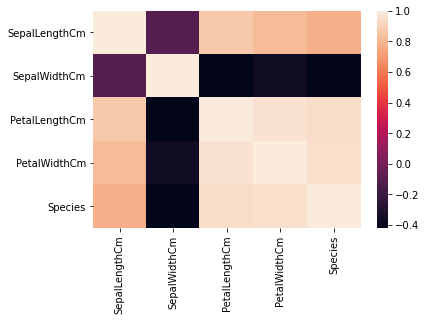

In [45]:
## Now for better understanding , lets visualize correlation results using heatmap
sns.heatmap(corr_result)

##### Since SepalWidthCm has outliers & has less correlation with the target variable, we can remove it

In [46]:
data=data.drop(['SepalWidthCm'],axis=1)

In [47]:
## SEPARATING THE DATA INTO INDEPENDANT VARIABLES

X=data.drop(['Species'],axis=1)
Y=data['Species']

In [48]:
X.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [49]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

### DECISION TREE CLASSIFIER:

In [50]:
### applying cross validation for testing data.
from sklearn.model_selection import cross_val_score

max_depth=[1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    d_model = DecisionTreeClassifier(criterion='entropy', random_state=0,max_depth=val)
    d_model.fit(X,Y)
    accuracy_cross_val=cross_val_score(d_model,X,Y,scoring='accuracy',cv=5)
    print(f'Average score({val}): {"{:.3f}".format(accuracy_cross_val.mean())}')

Average score(1): 0.667
Average score(2): 0.933
Average score(3): 0.960
Average score(4): 0.953
Average score(5): 0.953
Average score(6): 0.953
Average score(7): 0.953
Average score(8): 0.953
Average score(9): 0.953
Average score(10): 0.953


In [51]:
### So for the max_depth of "2" the model yields good accuracy than other max_depth values.

In [52]:
d_model=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=3)
accuracy_cross_val=cross_val_score(d_model,X,Y,scoring='accuracy',cv=5)
print(f'Average score({2}): {"{:.3f}".format(accuracy_cross_val.mean())}')

Average score(2): 0.960


##### Visualizing the tree:

[Text(209.25, 475.65000000000003, 'X[1] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(139.5, 339.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(279.0, 339.75, 'X[2] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(139.5, 203.85000000000002, 'X[1] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(69.75, 67.94999999999999, 'entropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(209.25, 67.94999999999999, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(418.5, 203.85000000000002, 'X[1] <= 4.85\nentropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(348.75, 67.94999999999999, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(488.25, 67.94999999999999, 'entropy = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

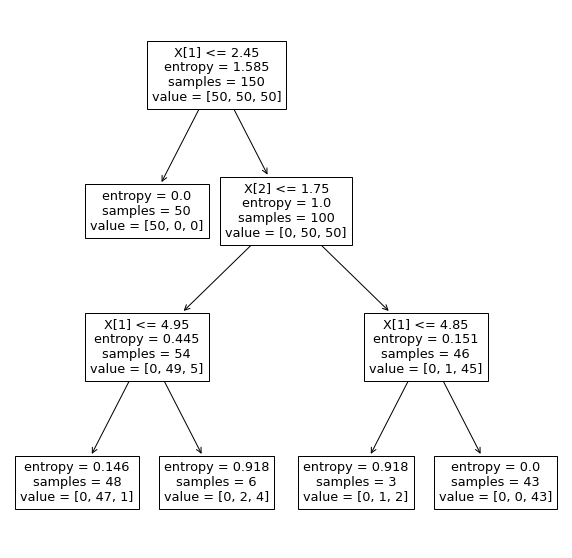

In [55]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(d_model.fit(X,Y))